In [1]:
import tensorflow as tf#untuk pengembangan jaringan saraf
from tensorflow.keras import datasets, layers, models# untuk membangun, melatih, dan menguji model jaringan saraf.
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt#untuk membuat visualisasi dan plot data

Epoch 1/10
1875/1875 [==============================] - 137s 66ms/step - loss: 0.1602 - accuracy: 0.9510 - val_loss: 0.0597 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0326 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0252 - accuracy: 0.9925 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0307 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 125s 66ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0

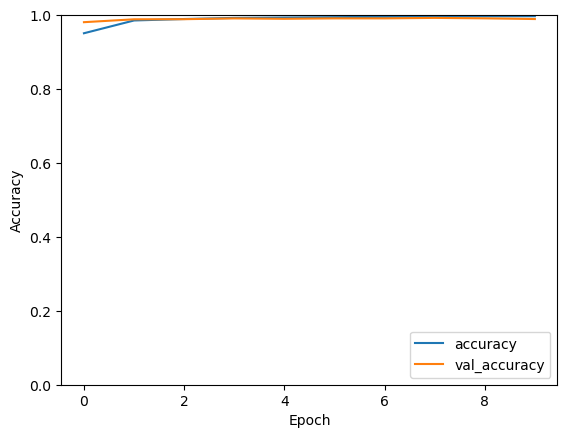

In [3]:

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to fit the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()